## Data Cleaning and Preprocessing 

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns

In [4]:
#Import dataset
df = pd.read_csv("C:/Users/dompr/Downloads/dataset/data/bank-additional-full.csv", header=0, delimiter=";", quotechar='"') 
pd.set_option('display.max_columns', None) 

In [7]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [9]:
df.shape

(41188, 21)

## Extended Data Analysis (Univariate) for numerical variables

In [12]:
df.describe() #checking for outliers, missing values or skewness in the numerical variables using EDD

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


## Observation
1. No missing value
2. Outlier - Campaign has a possible outlier. 25% clients were contacted only once, and 75% client were contacted 3 times. However some were contacted up tp 56 times
3. skewness  duration.

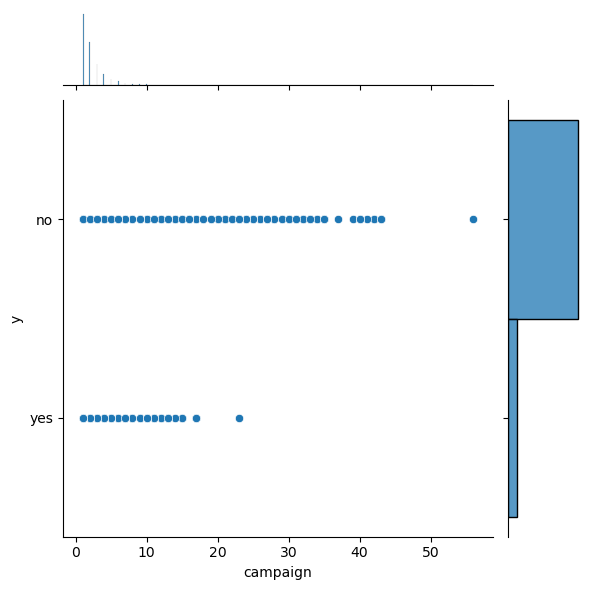

In [15]:
sns.jointplot(x="campaign", y="y", data=df)

In [16]:
# outlier treatment
uv = np.percentile(df['campaign'], 99)

In [19]:
print(uv)

14.0


In [21]:
df.loc[df['campaign'] > uv, 'campaign'] = uv

In [23]:
print(df['campaign'].describe())

count    41188.000000
mean         2.500024
std          2.301191
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         14.000000
Name: campaign, dtype: float64


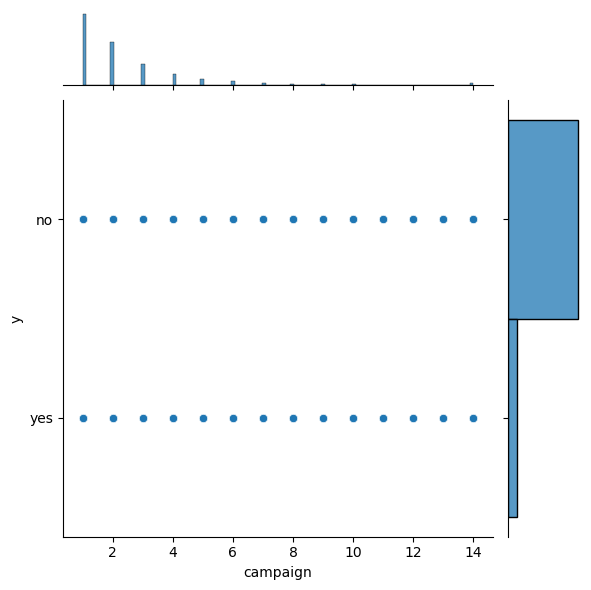

In [25]:
sns.jointplot(x="campaign", y="y", data=df)

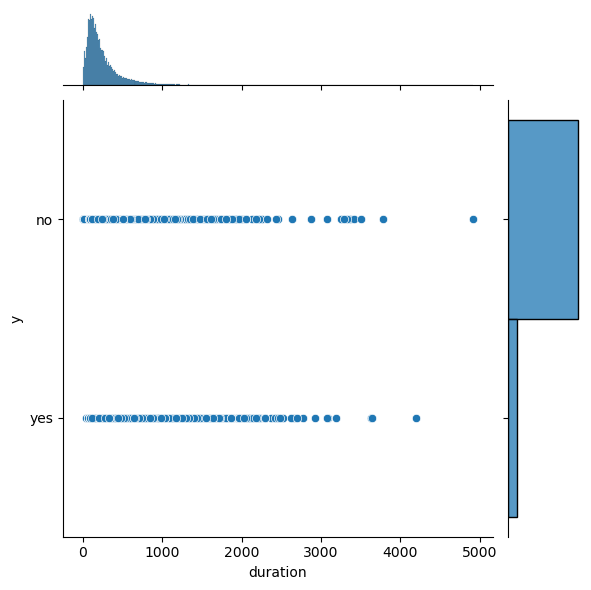

In [27]:
sns.jointplot(x="duration", y="y", data=df)

In [28]:
#outlier treatment
uv = np.percentile(df['duration'], 99)

In [31]:
print(uv)

1271.1299999999974


In [33]:
df.loc[df['duration'] > uv, 'duration'] = uv

C:\Users\dompr\AppData\Local\Temp\ipykernel_21112\1206323564.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1271.1299999999974' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['duration'] > uv, 'duration'] = uv


In [35]:
print(df['duration'].describe())

count    41188.000000
mean       254.350528
std        235.214731
min          0.000000
25%        102.000000
50%        180.000000
75%        319.000000
max       1271.130000
Name: duration, dtype: float64


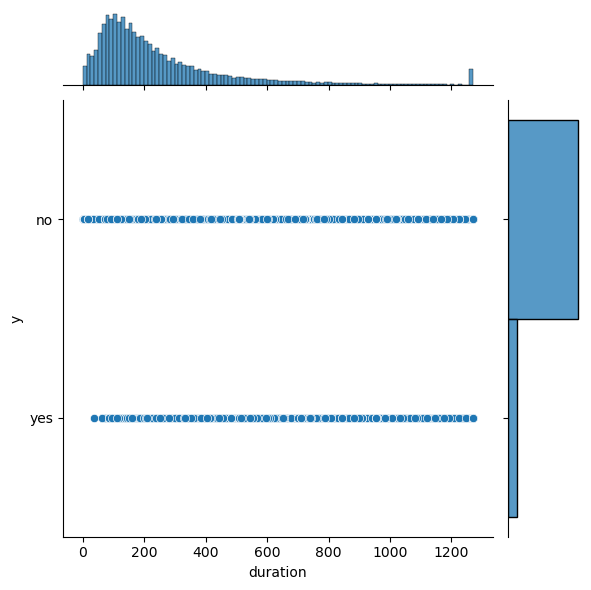

In [37]:
sns.jointplot(x="duration", y="y", data=df)

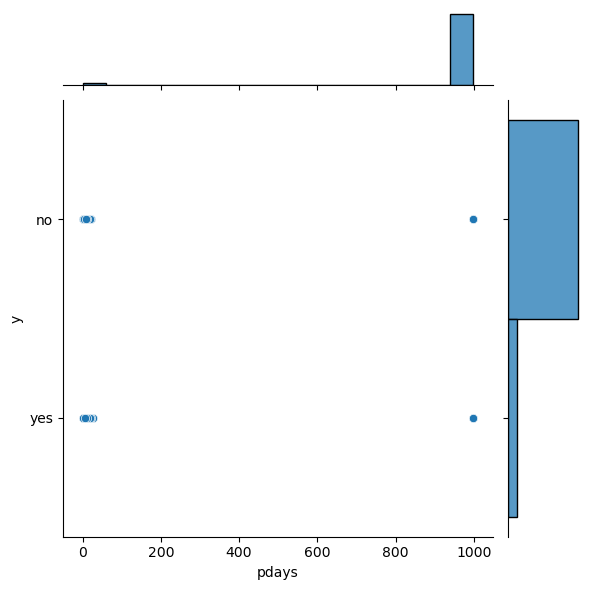

In [39]:
sns.jointplot(x="pdays", y="y", data=df)

#### Pdays means Days since the client was last contacted. This is a special case because although it's a numerical value but has to be treated as a categorical: not_contacted for long(case of 999) and contact not long ago(case of 0). So this is not outlier.

In [42]:
import matplotlib.pyplot as plt

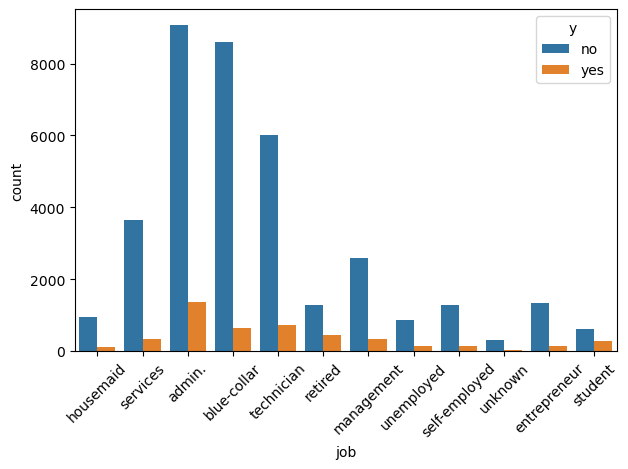

In [44]:
sns.countplot(x="job", data=df, hue="y")
plt.xticks(rotation=45)
plt.tight_layout()      
plt.show()

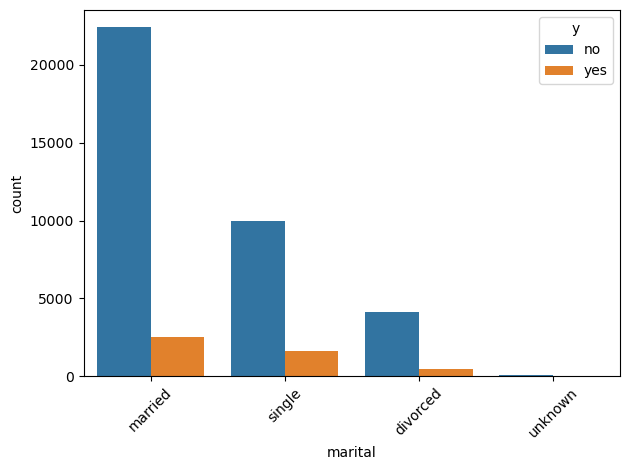

In [46]:
sns.countplot(x="marital", data=df, hue="y")
plt.xticks(rotation=45)
plt.tight_layout()      
plt.show()

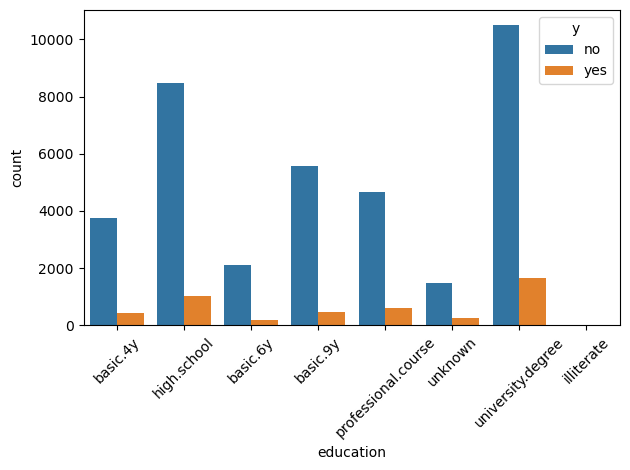

In [48]:
sns.countplot(x="education", data=df, hue="y")
plt.xticks(rotation=45)
plt.tight_layout()      
plt.show()

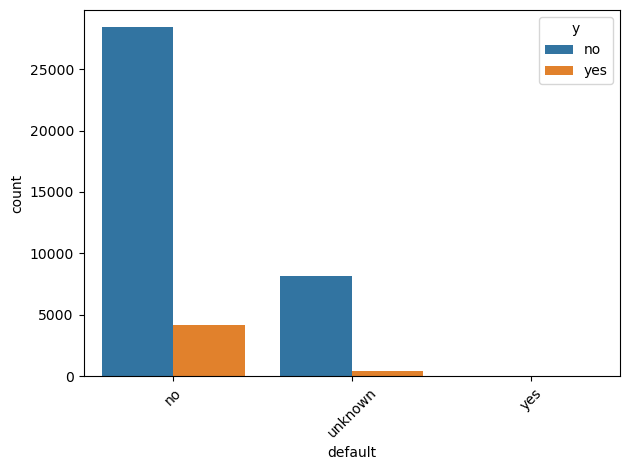

In [50]:
sns.countplot(x="default", data=df, hue="y")
plt.xticks(rotation=45)
plt.tight_layout()      
plt.show()

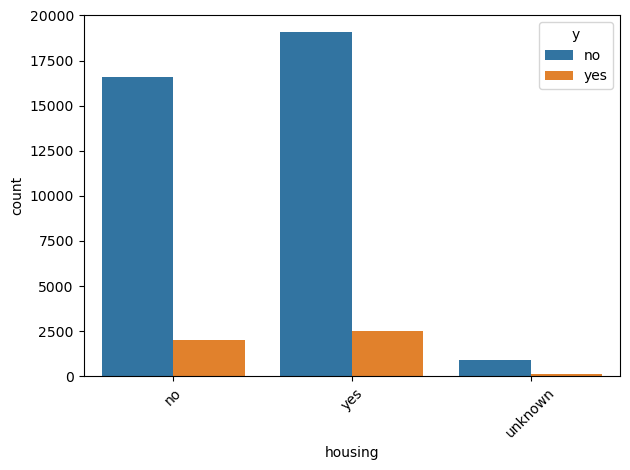

In [52]:
sns.countplot(x="housing", data=df, hue="y")
plt.xticks(rotation=45)
plt.tight_layout()      
plt.show()

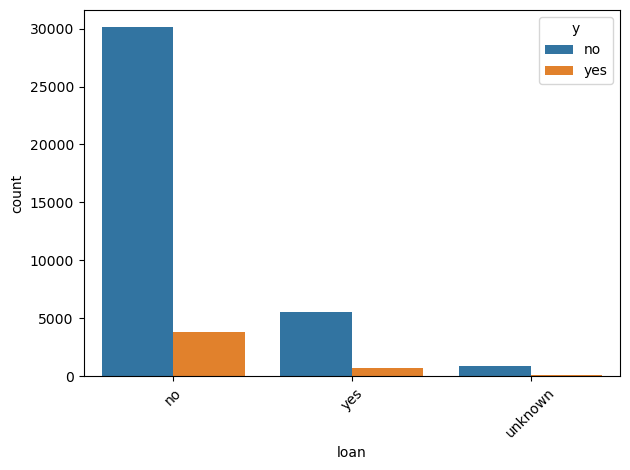

In [54]:
sns.countplot(x="loan", data=df, hue="y")
plt.xticks(rotation=45)
plt.tight_layout()      
plt.show()

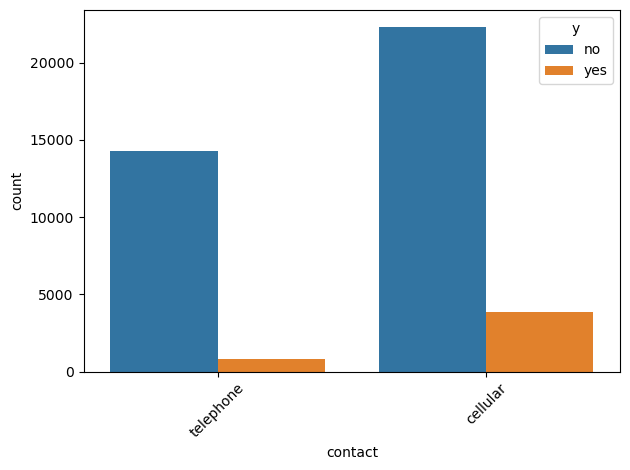

In [56]:
sns.countplot(x="contact", data=df, hue="y")
plt.xticks(rotation=45)
plt.tight_layout()      
plt.show()

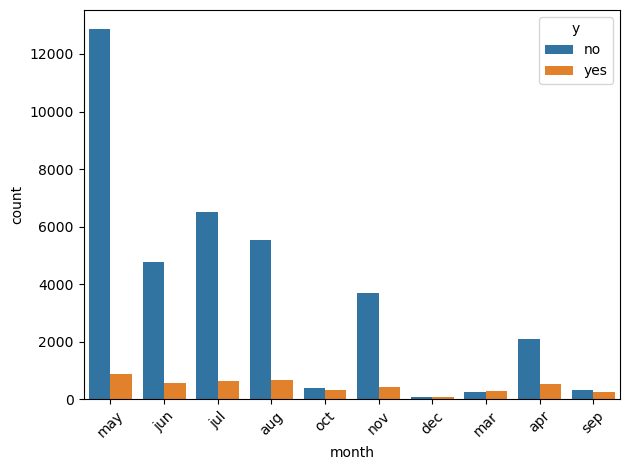

In [58]:
sns.countplot(x="month", data=df, hue="y")
plt.xticks(rotation=45)
plt.tight_layout()      
plt.show()

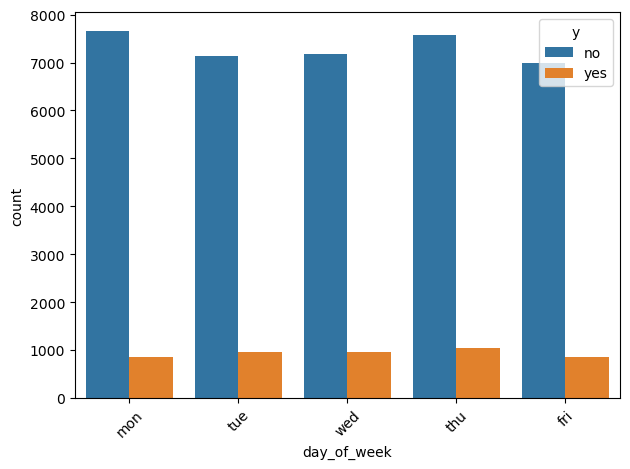

In [60]:
sns.countplot(x="day_of_week", data=df, hue="y")
plt.xticks(rotation=45)
plt.tight_layout()      
plt.show()

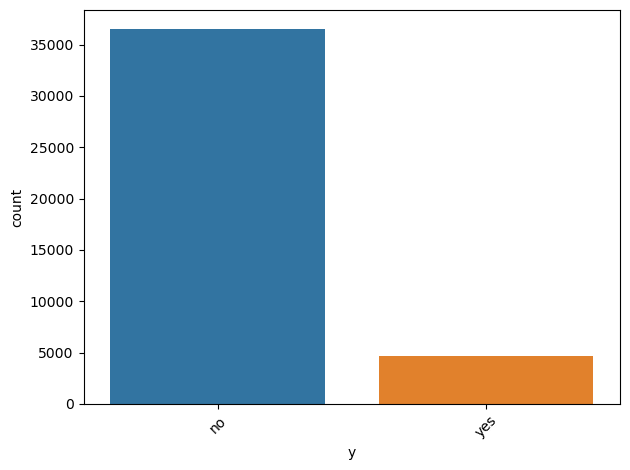

In [62]:
sns.countplot(x="y", data=df,hue="y")
plt.xticks(rotation=45)
plt.tight_layout()      
plt.show()

#### From the graph of the target variable, i observe a class imbalance, the number of "no" is so much as compared to the number of "yes". As this can greatly impact the model negatively, there a need to work on the imbalance

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  float64
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

## Before anything let's convert the categorical variable into dummy variable

In [70]:
# converting categorical variable into binary (encoding)
df = pd.get_dummies(df, drop_first=True).astype(int)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   age                            41188 non-null  int32
 1   duration                       41188 non-null  int32
 2   campaign                       41188 non-null  int32
 3   pdays                          41188 non-null  int32
 4   previous                       41188 non-null  int32
 5   emp.var.rate                   41188 non-null  int32
 6   cons.price.idx                 41188 non-null  int32
 7   cons.conf.idx                  41188 non-null  int32
 8   euribor3m                      41188 non-null  int32
 9   nr.employed                    41188 non-null  int32
 10  job_blue-collar                41188 non-null  int32
 11  job_entrepreneur               41188 non-null  int32
 12  job_housemaid                  41188 non-null  int32
 13  job_management  

In [74]:
df.rename(columns={'y_yes': 'y'}, inplace=True)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   age                            41188 non-null  int32
 1   duration                       41188 non-null  int32
 2   campaign                       41188 non-null  int32
 3   pdays                          41188 non-null  int32
 4   previous                       41188 non-null  int32
 5   emp.var.rate                   41188 non-null  int32
 6   cons.price.idx                 41188 non-null  int32
 7   cons.conf.idx                  41188 non-null  int32
 8   euribor3m                      41188 non-null  int32
 9   nr.employed                    41188 non-null  int32
 10  job_blue-collar                41188 non-null  int32
 11  job_entrepreneur               41188 non-null  int32
 12  job_housemaid                  41188 non-null  int32
 13  job_management  

In [78]:
df.corr()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,y
age,1.000000,-0.000346,0.003814,-0.034369,0.024365,-0.016576,0.045492,0.127883,0.001021,-0.017917,-0.024191,0.031213,0.085403,0.062040,0.440772,-0.001356,-0.065731,-0.199749,-0.064383,-0.004426,0.047773,0.271266,-0.411703,0.001062,0.009897,-0.038320,-0.106550,0.017007,0.002054,-0.071138,0.069485,0.165001,0.001891,-0.001092,-0.001414,-0.001092,-0.007198,0.007021,0.065309,0.046563,-0.043563,-0.009532,0.008390,-0.067523,0.030045,0.053008,0.040889,0.019027,-0.021356,0.019137,-0.023671,-0.016376,0.035626,0.030399
duration,-0.000346,1.000000,-0.074161,-0.052507,0.024613,-0.030965,-0.002830,-0.007820,-0.040426,-0.049917,0.013279,0.004037,-0.006132,-0.000604,0.013227,0.002247,0.002693,0.016539,-0.014251,-0.006937,-0.007827,-0.004665,0.008331,0.010337,0.005303,0.006428,0.005793,0.001994,-0.011323,-0.012753,0.005514,-0.011182,-0.005480,-0.005173,-0.008345,-0.005173,-0.001885,-0.032142,-0.046008,0.023322,0.029862,-0.025764,-0.007259,0.011184,-0.018017,0.012600,0.019126,-0.024046,0.013684,0.004441,0.018033,-0.015116,0.049286,0.421340
campaign,0.003814,-0.074161,1.000000,0.057559,-0.085067,0.154137,0.086689,-0.006676,0.129085,0.151918,-0.001649,-0.002687,0.005862,-0.009822,-0.010762,0.006328,0.002267,-0.025794,0.002519,0.000134,0.004496,-0.000250,-0.007308,0.010543,0.001930,-0.008218,0.000432,-0.002019,0.003367,0.000409,0.003863,0.037184,-0.004327,-0.000208,-0.012454,-0.000208,0.007201,0.079073,0.026234,-0.009863,0.097557,0.066353,-0.016145,-0.028534,-0.085365,-0.055224,-0.037391,0.017529,-0.002741,-0.025208,-0.020386,0.093915,-0.055809,-0.070182
pdays,-0.034369,-0.052507,0.057559,1.000000,-0.587514,0.291095,0.013846,-0.092210,0.319902,0.372951,0.065335,0.019246,-0.001649,0.000254,-0.072084,0.014307,0.030573,-0.096367,0.004575,-0.023085,-0.011419,0.031614,-0.042015,-0.005989,0.023238,0.036963,0.005522,-0.002086,-0.003493,-0.036958,-0.022014,0.080047,0.001668,0.002033,-0.010719,0.002033,-0.000086,0.117970,-0.003176,-0.076425,0.049695,0.015957,-0.078769,0.070690,-0.016946,-0.128677,-0.154629,0.001031,-0.008186,-0.007300,0.001021,0.491353,-0.950700,-0.324914
previous,0.024365,0.024613,-0.085067,-0.587514,1.000000,-0.425267,-0.109035,-0.056066,-0.457913,-0.501780,-0.054845,-0.013239,-0.011569,0.006735,0.065113,-0.011231,-0.011885,0.104671,-0.017142,0.008426,-0.003345,-0.043420,0.048485,0.009095,-0.021493,-0.026418,0.014347,-0.002613,-0.007631,0.025419,0.022641,-0.102604,0.002766,0.003769,0.020446,0.003769,-0.002143,-0.212848,-0.048852,0.059557,-0.116785,-0.069905,0.072733,-0.012534,0.081050,0.127754,0.157651,-0.002012,0.001512,0.000090,-0.003929,-0.878776,0.524045,0.230181
emp.var.rate,-0.016576,-0.030965,0.154137,0.291095,-0.425267,1.000000,0.606969,0.140675,0.929345,0.896748,0.074965,0.011590,0.031633,-0.017577,-0.119256,0.000586,0.028865,-0.143555,0.048167,-0.023878,0.013676,0.078299,-0.097613,-0.007565,0.029721,0.032108,-0.011903,-0.002884,0.018228,-0.057706,-0.006265,0.209141,0.003914,0.002889,-0.059215,0.002889,0.001801,0.413065,0.149025,-0.178190,0.281348,0.122770,-0.119695,-0.016844,-0.132859,-0.274820,-0.221632,-0.018379,-0.008352,0.011797,0.025591,0.470233,-0.275269,-0.315256
cons.price.idx,0.045492,-0.002830,0.086689,0.013846,-0.109035,0.606969,1.000000,0.081007,0.525825,0.424290,0.003058,0.0

In [80]:
# split features and target
X = df.drop("y", axis=1)
y = df["y"]

In [82]:
df["y"].value_counts(normalize=True)

y
0    0.887346
1    0.112654
Name: proportion, dtype: float64

In [84]:
df["y"]=df["y"].map({"no":0, "yes":1})

In [86]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logreg = LogisticRegression(class_weight="balanced", solver="saga", max_iter=1000, random_state=42)
logreg.fit(X_train_scaled, y_train)

# i had convergence warning as a result of the get_dummies from pandas that added more columns. Hence i needed an optimization algorithm that can help resolve that.
# saga is an optimization algorithm that helped in this context.

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42,
                   solver='saga')

In [90]:
# interpreting model coefficient from original model before trained (X_train)
feature_names = X_train.columns

In [92]:
# coefficient of trained model
coefficients = logreg.coef_[0]

In [94]:
# convert the coefficient into odd ratio
odd_ratios = np.exp(coefficients)

In [100]:
coef_df = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": coefficients,
    "Odd ratio": odd_ratios
})

In [102]:
print(coef_df)

                          Feature  Coefficient  Odd ratio
0                             age     0.021814   1.022054
1                        duration     1.679112   5.360795
2                        campaign    -0.094385   0.909932
3                           pdays    -0.209198   0.811234
4                        previous    -0.035673   0.964956
5                    emp.var.rate    -0.711384   0.490964
6                  cons.price.idx    -0.093426   0.910805
7                   cons.conf.idx    -0.090700   0.913292
8                       euribor3m     0.668528   1.951363
9                     nr.employed    -1.246689   0.287455
10                job_blue-collar    -0.122393   0.884800
11               job_entrepreneur    -0.031351   0.969135
12                  job_housemaid    -0.007746   0.992284
13                 job_management    -0.013885   0.986211
14                    job_retired     0.093007   1.097469
15              job_self-employed    -0.025486   0.974836
16            

In [104]:
from sklearn.metrics import classification_report

y_pred = logreg.predict(X_test_scaled)

print(classification_report(y_test, y_pred, target_names=['No', 'Yes']))


              precision    recall  f1-score   support

          No       0.99      0.86      0.92      7310
         Yes       0.45      0.91      0.60       928

    accuracy                           0.86      8238
   macro avg       0.72      0.89      0.76      8238
weighted avg       0.93      0.86      0.88      8238



## SUMMARY AND FINDINGS
**GOAL**: Predict whether a client will subscribe YES or NO to a term deposit using a phone call campaign of a bank.

**DATASET**: Bank addition full data, 41188 records with 20 distinct features like age, job, marital, education, default, housing, campaign, duration and more.

### DATA PREPARATION
1. No missing data
2. Removed Outliers
3. Encoding categorical variables using pandas get_dummies 

### FINDINGS FROM EXPLORATORY ANALYSIS
1. Clients that were long contacted mostly subscribes No. Contacting clients occassionaly will make most subscription for Yes deposit
2. Clients who work as admin, blue collar, techincian and retirees are most likely to subcribe Yes
3. Married and single clients tends to subcribe yes
4. Contacting clients who uses cellular(phone) are most likely to subscribe Yes
5. Subcription to Yes is high within April to August.

### MODEL PERFORMANCE (Logistic Regression)
| Metric        | Class = No | Class = Yes | **Macro Avg** | **Weighted Avg** |
| ------------- | ---------- | ----------- | ------------- | ---------------- |
| **Precision** | 0.99       | 0.45        | 0.72          | 0.93             |
| **Recall**    | 0.86       | 0.91        | 0.89          | 0.86             |
| **F1 Score**  | 0.92       | 0.60        | 0.76          | 0.88             |
| **Support**   | 7,310      | 928         | 8,238         | 8,238            |
| **Accuracy**  | —          | —           | —             | **0.86**         |

1. The model has an accuracy of 86%. This is 
2. Almost all the time the model predicts NO, it is correct. It has high precision of 99%. Howerver, when it predicts YES, it only 45% true
3. It correctly get 86% of clients who will sucscribe NO .However, it successfully finds 91% of clients who will subscribe YES to the term deposit. This model is reliable for spotting non-subscriber and good at finding subscribers but not good about being sure of them.